# Downloading Libraries & Data

In [98]:
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [99]:
speeches = pd.read_csv('UNGA-2023.csv', encoding='latin1')
speeches

,Country,Statement
0,New Zealand,"Mr. President, [and Secretary-General if prese..."
1,Cambodia,"Mr. President of the General Assembly,\nDistin..."
2,Ireland,"President,\nAt the outset, allow me to thank y..."
3,Singapore,"Mr President,\n1 Singapore welcomes the conven..."
4,EU,"Mr President,\nThe Candidate Countries North M..."
5,Malta,"President, Excellencies We have convened here ..."
6,Iceland,"Mr. President, We are convening this Emergency..."
7,Poland,"Mr. President, Multilateralism has always been..."
8,Bulgaria,"Mr. President,\nBulgaria is gravely concerned ..."
9,Portugal,"Thank you Mr. President,\n[We align ourselves ..."


In [100]:
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('stopwords')  # Stopwords
nltk.download('svgling')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading svgling: Package 'svgling' not found in
[nltk_data]     index


False

# Task 1: Finding Top 10 Most Common Nouns

## NLP & Text Analysis

### 1. Replacing non-alphabetic character with white space
### 2. Sentence Tokenization
### 3. Word Tokenization
### 4. Stopword Removal
### 5. POS Tagging
### 6. Chunking
### 7. Lemmatization

In [102]:
speeches['Statement'][0] #test for regex

'Mr. President, [and Secretary-General if present], New Zealand welcomes the convening of this General Assembly Emergency Special Session. We regret the UN Security Council has been unable to perform its responsibility to act on behalf of all Member States. Therefore, it is incumbent upon us all as members of the General Assembly to exercise our collective political responsibility under the UN Charter to address matters of international peace and security. President, even as this meeting convenes, the conflict in Israel and Palestine escalates, the humanitarian crisis worsens, and civilian lives continue to be needlessly lost. It is intolerable to see civilians, many of whom are children and infants, continue to suffer disproportionately as innocent victims of this conflict. As I said in the Security Council two days ago, New Zealand condemns absolutely Hamas¡¯ terrorist attacks on Israel. We are appalled by their brutality, their targeting of civilians, and the taking of hostages. The

## 1. Replacing non-alphabetic character with white space¶

In [104]:
def clean_speech(text):
    text = re.sub(r'[^a-zA-Z .]', ' ', text)
    text = re.sub(r'Mr.', 'Mr ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [105]:
cleaned_speeches = []

for speech in speeches['Statement']:
    cleaned_speech = clean_speech(speech)
    cleaned_speeches.append(cleaned_speech)


cleaned_speeches

['Mr President and Secretary General if present New Zealand welcomes the convening of this General Assembly Emergency Special Session. We regret the UN Security Council has been unable to perform its responsibility to act on behalf of all Member States. Therefore it is incumbent upon us all as members of the General Assembly to exercise our collective political responsibility under the UN Charter to address matters of international peace and security. President even as this meeting convenes the conflict in Israel and Palestine escalates the humanitarian crisis worsens and civilian lives continue to be needlessly lost. It is intolerable to see civilians many of whom are children and infants continue to suffer disproportionately as innocent victims of this conflict. As I said in the Security Council two days ago New Zealand condemns absolutely Hamas terrorist attacks on Israel. We are appalled by their brutality their targeting of civilians and the taking of hostages. These are clear vio

## 2-3. Sentence Tokenization & Word Tokenization

In [107]:
tokenized_speeches = []

for speech in cleaned_speeches:
    sent_tokenized_speech = nltk.sent_tokenize(speech)
    word_tokenized_speech = []
    
    for st_speech in sent_tokenized_speech:
        word_tokenized_sentence = nltk.word_tokenize(st_speech)
        word_tokenized_speech.append(word_tokenized_sentence)
        
    tokenized_speeches.append(word_tokenized_speech)
tokenized_speeches        

[[['Mr',
   'President',
   'and',
   'Secretary',
   'General',
   'if',
   'present',
   'New',
   'Zealand',
   'welcomes',
   'the',
   'convening',
   'of',
   'this',
   'General',
   'Assembly',
   'Emergency',
   'Special',
   'Session',
   '.'],
  ['We',
   'regret',
   'the',
   'UN',
   'Security',
   'Council',
   'has',
   'been',
   'unable',
   'to',
   'perform',
   'its',
   'responsibility',
   'to',
   'act',
   'on',
   'behalf',
   'of',
   'all',
   'Member',
   'States',
   '.'],
  ['Therefore',
   'it',
   'is',
   'incumbent',
   'upon',
   'us',
   'all',
   'as',
   'members',
   'of',
   'the',
   'General',
   'Assembly',
   'to',
   'exercise',
   'our',
   'collective',
   'political',
   'responsibility',
   'under',
   'the',
   'UN',
   'Charter',
   'to',
   'address',
   'matters',
   'of',
   'international',
   'peace',
   'and',
   'security',
   '.'],
  ['President',
   'even',
   'as',
   'this',
   'meeting',
   'convenes',
   'the',
   'confli

## 4. Stopword Removal

In [138]:
stop_words = set(nltk.corpus.stopwords.words('english'))
custom_stop_words = [
    'Mr', 'President', 'Session', 'General', 'Assembly', 'Security',
    'Council','Member','States', 'members', 'UN','Charter','international', 
    'meeting', 'thank', 'Secretary','General', 'Thank'
]

stop_words.update(custom_stop_words)
stop_words

{'Assembly',
 'Charter',
 'Council',
 'General',
 'Member',
 'Mr',
 'President',
 'Secretary',
 'Security',
 'Session',
 'States',
 'Thank',
 'UN',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'international',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'meeting',
 'members',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'm

In [140]:
stopword_removed_speeches = []

for speech in tokenized_speeches:
    removed_speech = []
    for sentence in speech:
        removed_sentence = [word for word in sentence if ((word not in stop_words)&(word != '.'))]
        removed_speech.append(removed_sentence)
    stopword_removed_speeches.append(removed_speech)
stopword_removed_speeches

[[['present',
   'New',
   'Zealand',
   'welcomes',
   'convening',
   'Emergency',
   'Special'],
  ['We', 'regret', 'unable', 'perform', 'responsibility', 'act', 'behalf'],
  ['Therefore',
   'incumbent',
   'upon',
   'us',
   'exercise',
   'collective',
   'political',
   'responsibility',
   'address',
   'matters',
   'peace',
   'security'],
  ['even',
   'convenes',
   'conflict',
   'Israel',
   'Palestine',
   'escalates',
   'humanitarian',
   'crisis',
   'worsens',
   'civilian',
   'lives',
   'continue',
   'needlessly',
   'lost'],
  ['It',
   'intolerable',
   'see',
   'civilians',
   'many',
   'children',
   'infants',
   'continue',
   'suffer',
   'disproportionately',
   'innocent',
   'victims',
   'conflict'],
  ['As',
   'I',
   'said',
   'two',
   'days',
   'ago',
   'New',
   'Zealand',
   'condemns',
   'absolutely',
   'Hamas',
   'terrorist',
   'attacks',
   'Israel'],
  ['We',
   'appalled',
   'brutality',
   'targeting',
   'civilians',
   'taking

## 5. POS tagging

In [142]:
pos_tagged_speeches = []

for speech in stopword_removed_speeches:
    tagged_speech = [nltk.pos_tag(sentence) for sentence in speech]
    pos_tagged_speeches.append(tagged_speech)
pos_tagged_speeches

        

[[[('present', 'JJ'),
   ('New', 'NNP'),
   ('Zealand', 'NNP'),
   ('welcomes', 'VBZ'),
   ('convening', 'VBG'),
   ('Emergency', 'NNP'),
   ('Special', 'NNP')],
  [('We', 'PRP'),
   ('regret', 'VBP'),
   ('unable', 'JJ'),
   ('perform', 'NN'),
   ('responsibility', 'NN'),
   ('act', 'NN'),
   ('behalf', 'NN')],
  [('Therefore', 'RB'),
   ('incumbent', 'JJ'),
   ('upon', 'IN'),
   ('us', 'PRP'),
   ('exercise', 'VBP'),
   ('collective', 'JJ'),
   ('political', 'JJ'),
   ('responsibility', 'NN'),
   ('address', 'NN'),
   ('matters', 'NNS'),
   ('peace', 'VBP'),
   ('security', 'NN')],
  [('even', 'RB'),
   ('convenes', 'NNS'),
   ('conflict', 'VBP'),
   ('Israel', 'NNP'),
   ('Palestine', 'NNP'),
   ('escalates', 'VBZ'),
   ('humanitarian', 'JJ'),
   ('crisis', 'NN'),
   ('worsens', 'NNS'),
   ('civilian', 'JJ'),
   ('lives', 'NNS'),
   ('continue', 'VBP'),
   ('needlessly', 'RB'),
   ('lost', 'VBN')],
  [('It', 'PRP'),
   ('intolerable', 'JJ'),
   ('see', 'VB'),
   ('civilians', 'NNS')

## 6. Chunking

In [143]:
# Step 6: Define the chunk grammar rules
chunk_grammar = r"""
  NP: {<DT>?<JJ>*<NN.*>}  # Noun Phrase
  VP: {<VB.*><RB.*>*}     # Verb Phrase
  ADJP: {<JJ><CC>?<JJ>*}  # Adjective Phrase

"""
#  PP: {<IN><NP>}          # Prepositional Phrase
# ADVP: {<RB><RB.*>*}     # Adverb Phrase

In [146]:
chunk_parser = nltk.RegexpParser(chunk_grammar)
chunk_grammar

'\n  NP: {<DT>?<JJ>*<NN.*>}  # Noun Phrase\n  VP: {<VB.*><RB.*>*}     # Verb Phrase\n  ADJP: {<JJ><CC>?<JJ>*}  # Adjective Phrase\n\n'

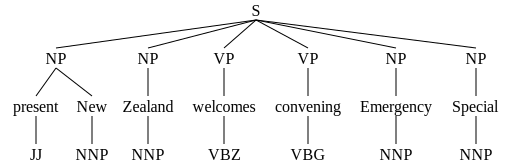

In [148]:
chunked_sentence = chunk_parser.parse(pos_tagged_speeches[0][0])
chunked_sentence


## 7. Lemmatization Based on POS Tags

In [150]:
lemmatizer = WordNetLemmatizer()

In [152]:
def get_wordnet_pos(treebank_tag):
    
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
        
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
        
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
        
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

In [154]:
# 수정하기 -> 그냥 일반으로 바꿔?
lemmatized_speeches = []

for speech in pos_tagged_speeches:
    lemmatized_speech = []
    for sentence in speech:
        chunked_sentence = chunk_parser.parse(sentence)
        lemmatized_sentence = []

        for subtree in chunked_sentence:
            # Check if the subtree is chunk or just a single word
            if isinstance(subtree, nltk.Tree):
                chunk_type = subtree.label()

                # Define lemmatization strategy based on chunk type
                pos = {'NP': nltk.corpus.wordnet.NOUN, 'VP': nltk.corpus.wordnet.VERB, 'ADJP': nltk.corpus.wordnet.ADJ}.get(chunk_type, None)

                if pos:
                    # Lemmatize entire chunk according to chunk type POS
                    lemmatized_chunk = [(lemmatizer.lemmatize(word.lower(), pos), pos_tag) for word, pos_tag in subtree.leaves()]
                else:
                    # Default lemmatization for unknown chunk types
                    lemmatized_chunk = [(lemmatizer.lemmatize(word.lower(), get_wordnet_pos(pos_tag)), pos_tag) for word, pos_tag in subtree.leaves()]

                # Add lemmatized chunk to the sentence
                lemmatized_sentence.extend(lemmatized_chunk)
            else:
                # Single word not in any chunk
                word, pos = subtree
                lemmatized_word = lemmatizer.lemmatize(word.lower(), get_wordnet_pos(pos))
                lemmatized_sentence.append((lemmatized_word, pos))
        
        lemmatized_speech.append(lemmatized_sentence)
    lemmatized_speeches.append(lemmatized_speech)

lemmatized_speeches

[[[('present', 'JJ'),
   ('new', 'NNP'),
   ('zealand', 'NNP'),
   ('welcome', 'VBZ'),
   ('convene', 'VBG'),
   ('emergency', 'NNP'),
   ('special', 'NNP')],
  [('we', 'PRP'),
   ('regret', 'VBP'),
   ('unable', 'JJ'),
   ('perform', 'NN'),
   ('responsibility', 'NN'),
   ('act', 'NN'),
   ('behalf', 'NN')],
  [('therefore', 'RB'),
   ('incumbent', 'JJ'),
   ('upon', 'IN'),
   ('u', 'PRP'),
   ('exercise', 'VBP'),
   ('collective', 'JJ'),
   ('political', 'JJ'),
   ('responsibility', 'NN'),
   ('address', 'NN'),
   ('matter', 'NNS'),
   ('peace', 'VBP'),
   ('security', 'NN')],
  [('even', 'RB'),
   ('convenes', 'NNS'),
   ('conflict', 'VBP'),
   ('israel', 'NNP'),
   ('palestine', 'NNP'),
   ('escalate', 'VBZ'),
   ('humanitarian', 'JJ'),
   ('crisis', 'NN'),
   ('worsens', 'NNS'),
   ('civilian', 'JJ'),
   ('life', 'NNS'),
   ('continue', 'VBP'),
   ('needlessly', 'RB'),
   ('lose', 'VBN')],
  [('it', 'PRP'),
   ('intolerable', 'JJ'),
   ('see', 'VB'),
   ('civilian', 'NNS'),
   ('m

In [ ]:
# Start Here

## Find the 10 Most Common Nouns

In [158]:
total_nouns = []

for speech in pos_tagged_speeches:
    for sentence in speech:
        nouns = [word for word, pos in sentence if pos.startswith('NN')]
        total_nouns.extend(nouns)
    

total_nouns

['New',
 'Zealand',
 'Emergency',
 'Special',
 'perform',
 'responsibility',
 'act',
 'behalf',
 'responsibility',
 'address',
 'matters',
 'security',
 'convenes',
 'Israel',
 'Palestine',
 'crisis',
 'worsens',
 'lives',
 'civilians',
 'children',
 'infants',
 'victims',
 'conflict',
 'days',
 'New',
 'Zealand',
 'Hamas',
 'terrorist',
 'attacks',
 'Israel',
 'brutality',
 'civilians',
 'hostages',
 'violations',
 'law',
 'release',
 'hostages',
 'Israel',
 'compliance',
 'law',
 'actions',
 'Gaza',
 'solution',
 'peace',
 'Israelis',
 'Palestinians',
 'protection',
 'delivery',
 'assistance',
 'priority',
 'New',
 'Zealand',
 'pause',
 'corridors',
 'assistance',
 'protection',
 'line',
 'principles',
 'workers',
 'circumstances',
 'assistance',
 'line',
 'duty',
 'events',
 'October',
 'New',
 'Zealand',
 'Resolution',
 'demands',
 'protection',
 'healthcare',
 'hospitals',
 'personnel',
 'Healthcare',
 'facilities',
 'purposes',
 'attack',
 'hundreds',
 'thousands',
 'persons',
 '

### Get the Most Common Words for Each Category

In [162]:
most_common_nouns = Counter(total_nouns).most_common(10)
most_common_nouns

[('Gaza', 116),
 ('Israel', 104),
 ('peace', 93),
 ('civilians', 88),
 ('law', 77),
 ('conflict', 63),
 ('people', 62),
 ('solution', 57),
 ('Hamas', 54),
 ('situation', 51)]

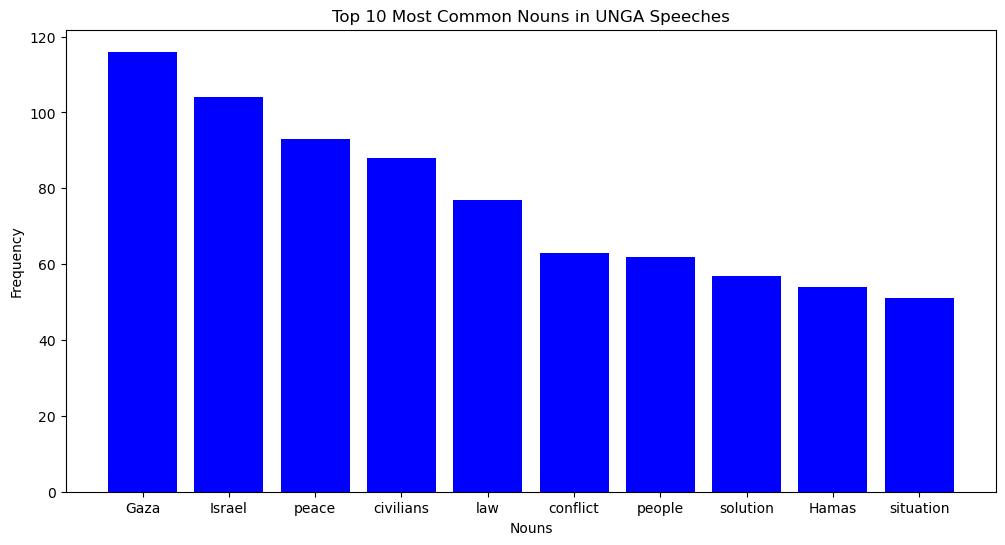

In [164]:
noun_list = []
noun_counts = []

for noun, count in most_common_nouns:
    noun_list.append(noun)
    noun_counts.append(count)

plt.figure(figsize=(12, 6))
plt.bar(noun_list, noun_counts, color='blue')
plt.xlabel('Nouns')
plt.ylabel('Frequency')
plt.title("Top 10 Most Common Nouns in UNGA Speeches")
plt.show()

## Visualization of Word Frequency 

In [ ]:
nouns_list, nouns_counts = zip(*most_common_nouns)
plt.figure(figsize=(12,6))
plt.bar(nouns_list, noun_counts, color = 'green')
plt.xlabel('Nouns')
plt.ylabel('Frequency')
plt.title("Top 10 mot common nouns in Obama's 2009 inaugural speech")

plt.show()



# Sentiment Analysis

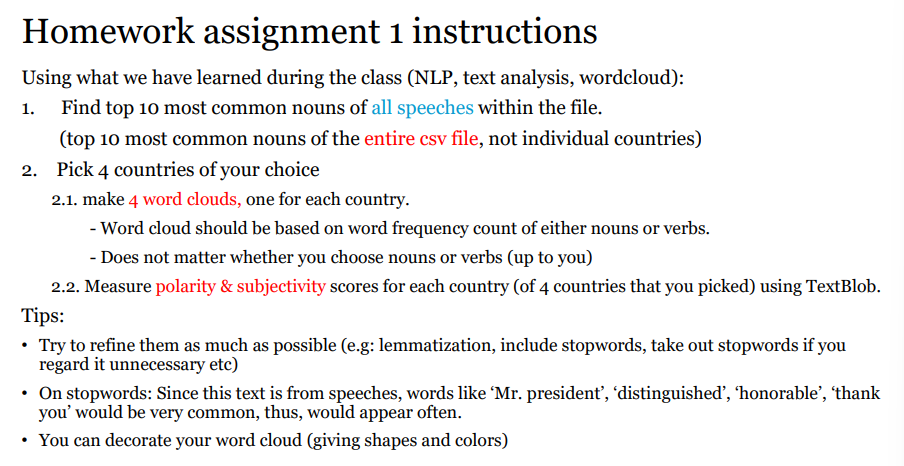

# Word Cloud